In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import os
import cv2

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [ ]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                          

In [ ]:
len(model.layers)

22

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [ ]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [5]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/Pixel_File_Corn.csv')

In [6]:
df = df.drop(columns = 'Unnamed: 0')

In [7]:

df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,149,130,139,141,122,131,149,130,139,142,...,119,146,173,146,164,183,76,108,133,3
2,145,141,146,179,175,180,185,182,184,194,...,147,140,145,147,131,140,118,127,140,0
3,118,146,125,130,162,146,117,146,114,107,...,0,0,0,0,0,0,0,0,0,1
4,66,63,65,67,64,66,54,55,59,20,...,78,120,102,80,112,100,94,136,113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9140,108,115,131,102,108,127,116,123,140,116,...,166,194,181,144,176,165,151,176,166,0
9141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9142,141,137,143,140,136,142,137,135,141,135,...,136,129,132,136,129,132,137,130,133,3
9143,125,125,126,114,113,115,123,122,124,125,...,66,111,82,65,111,89,79,122,89,0


In [8]:
print(len(df))
y = df.label
x = df.drop(columns = ['label'])

9145


In [9]:
print(y)
print(x)

0       1
1       3
2       0
3       1
4       0
       ..
9140    0
9141    0
9142    3
9143    0
9144    2
Name: label, Length: 9145, dtype: int64
        0    1    2    3    4    5    6    7    8    9  ...  2342  2343  2344  \
0       0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
1     149  130  139  141  122  131  149  130  139  142  ...   105   119   146   
2     145  141  146  179  175  180  185  182  184  194  ...   146   147   140   
3     118  146  125  130  162  146  117  146  114  107  ...     0     0     0   
4      66   63   65   67   64   66   54   55   59   20  ...   129    78   120   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9140  108  115  131  102  108  127  116  123  140  116  ...   171   166   194   
9141    0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
9142  141  137  143  140  136  142  137  135  141  135  ...   117   136   129   
9143  125  125  126  114  113  115  123 

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

In [ ]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 3,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/3
86/87 [============================>.] - ETA: 0s - loss: 0.2393 - accuracy: 0.9404

87/87 [==============================] - 10s 119ms/step - loss: 0.2397 - accuracy: 0.9403 - val_loss: 0.2316 - val_accuracy: 0.9396
Epoch 2/3
86/87 [============================>.] - ETA: 0s - loss: 0.2316 - accuracy: 0.9440

87/87 [==============================] - 8s 97ms/step - loss: 0.2321 - accuracy: 0.9440 - val_loss: 0.2302 - val_accuracy: 0.9396
Epoch 3/3
86/87 [============================>.] - ETA: 0s - loss: 0.2264 - accuracy: 0.9462

87/87 [==============================] - 10s 119ms/step - loss: 0.2298 - accuracy: 0.9458 - val_loss: 0.2226 - val_accuracy: 0.9380
Duration: 0:00:41.087619


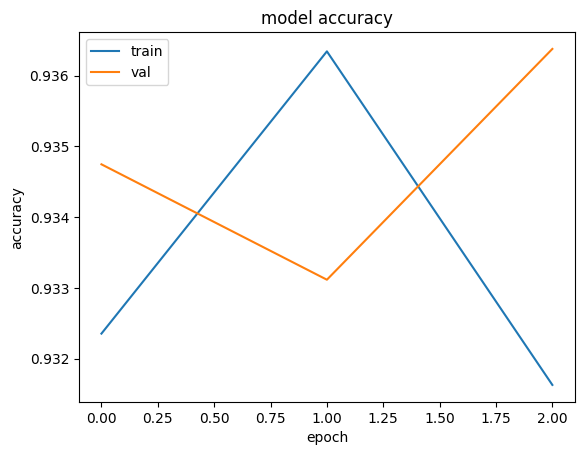

val 0.9363784790039062
min val 0.9331158399581909
acc 0.9363438487052917
mean val 0.9347471594810486


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])


plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [11]:
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

In [12]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/MODELS/Corn/cnn_model.h5')


189/189 [==============================] - 2s 9ms/step


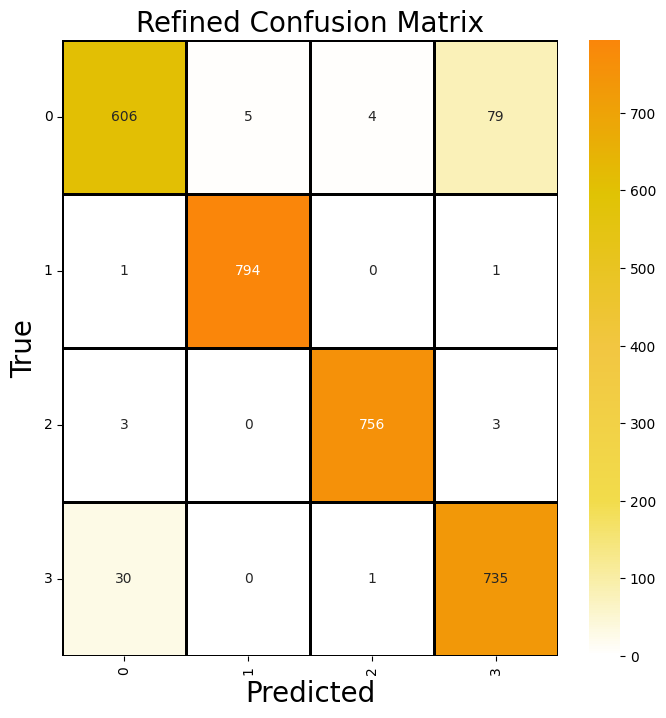

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Pred = model.predict(x_test, batch_size=16)
Pred_Label = np.argmax(Pred, axis=1)
cmap_unblended = sns.blend_palette(["#ffffff","#f2dc4b","#f2c641","#e0c304","#fa860a"], as_cmap=True)

ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0,1,2,3])
cm = ConfusionM
targetnames = [0,1,2,3]
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= cmap_unblended, linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

(3018,)
ROC AUC score: 0.9581256167948564


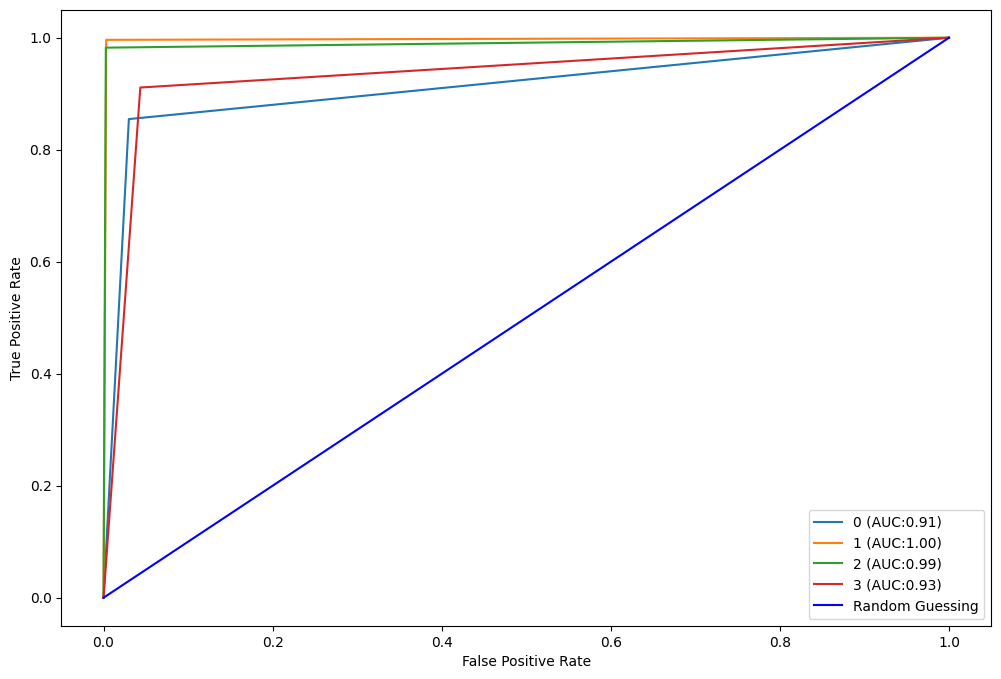

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= [0,1,2,3]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    print(y_test.shape)
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)



print('ROC AUC score:', multiclass_roc_auc_score(y_test, Pred_Label))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
targetnames = [0,1,2,3]
tar = []
for i in targetnames:
  tar.append(str(i))
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1, 2, 3], target_names=tar)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       647
           1       0.99      1.00      0.99       794
           2       0.99      0.98      0.99       790
           3       0.88      0.91      0.90       787

    accuracy                           0.94      3018
   macro avg       0.94      0.94      0.94      3018
weighted avg       0.94      0.94      0.94      3018



In [ ]:
model.save_weights('/content/drive/MyDrive/MODELS/Corn/cnn_model_weights.h5')

In [ ]:
model.save('/content/drive/MyDrive/MODELS/Corn/cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
